In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../../data/processed/Brazil/census_data/2010/weightening_area/universal_results/states/RS/'

In [3]:
categorie = 'Responsavel.csv'
data = pd.read_csv(path+categorie)
data.head()

,Cod_ap,CD_GEOCODM,NM_MUNICIP,V001,V002,V003,V004,V005,V006,V007,...,V099,V100,V101,V102,V103,V104,V105,V106,V107,V108
0,4.300034e+12,4300034,ACEGUÁ,279,0,0,1,0,0,0,...,22,36,26,23,24,27,17,14,7,3
1,4.300059e+12,4300059,ÁGUA SANTA,159,0,0,0,0,0,0,...,9,8,14,16,11,9,14,19,13,15
2,4.300109e+12,4300109,AGUDO,1557,0,2,0,0,1,2,...,130,148,138,137,117,104,83,83,53,48
3,4.300208e+12,4300208,AJURICABA,666,0,0,0,0,0,0,...,54,54,68,58,44,42,44,48,46,32
4,4.300307e+12,4300307,ALECRIM,575,0,0,0,0,0,0,...,25,47,38,63,50,46,50,54,30,30


In [4]:
columns = data.columns.values
constant_columns = (data != data.iloc[0]).any() == False
to_drop = columns[constant_columns].tolist()
data.drop(to_drop, axis=1, inplace = True)
to_drop

[]

In [5]:
data_no_geo = data.drop(['Cod_ap', 'CD_GEOCODM', 'NM_MUNICIP'], axis=1)
sum(data_no_geo.duplicated())

0

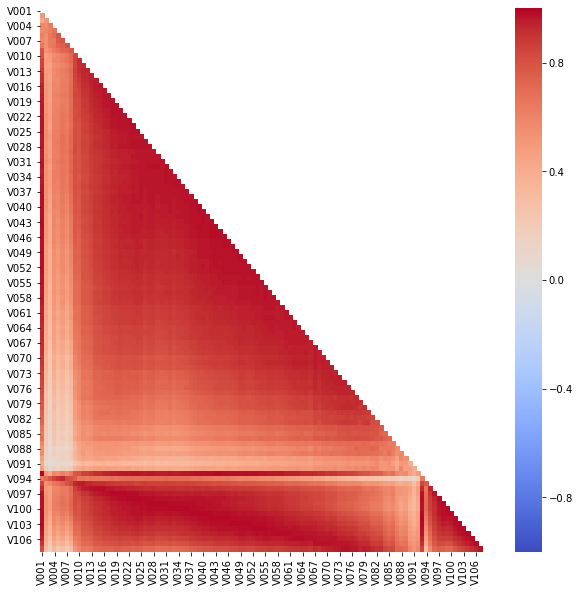

In [9]:
data_corr = data_no_geo.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(data_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);

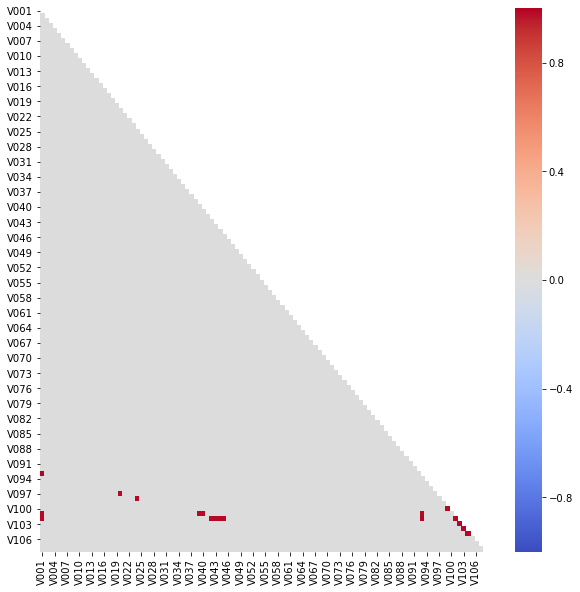

In [10]:
corr = data_corr.copy()
corr[np.abs(corr)<=0.99] = 0
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);

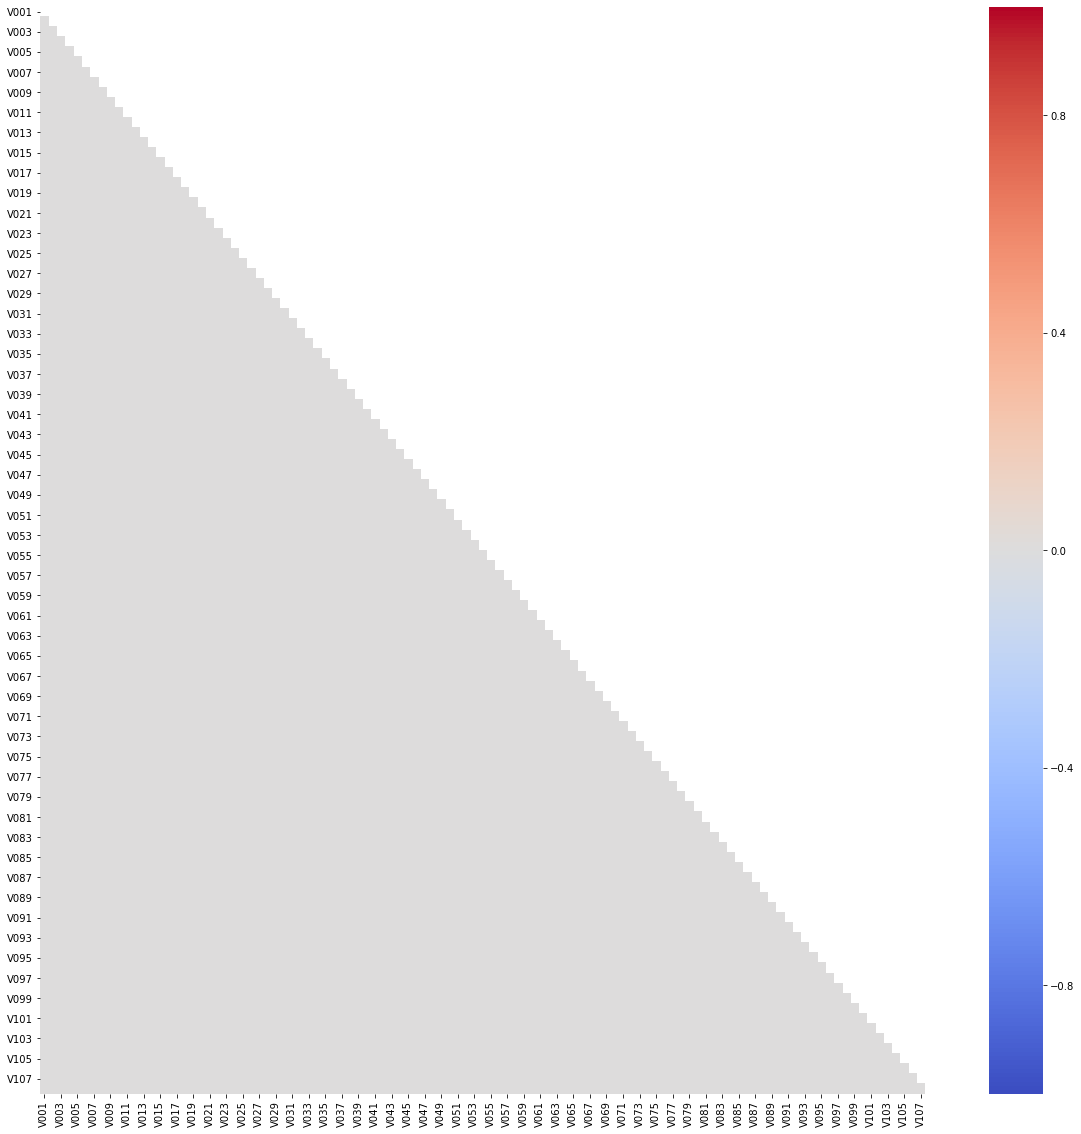

In [8]:
corr = data_corr.copy()
corr[np.abs(corr)< 1] = 0
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);